In [8]:
import sys
sys.path.insert(1,'../data_utils')
from ConfigDataset import ConfigDataset
from OrigamiTransform import OrigamiTransform
origami_transform = OrigamiTransform()

import torch
import matplotlib.pyplot as plt

In [2]:
segment_length = 64
config_fp = '../../data/processed_data.hdf5'
mean_dist_fp = '../../data/mean_dists.pt'
mean_sq_dist_fp='../../data/squares.pt'
training_chroms = ['X']#[f'{k}' for k in range(1,23)]

In [3]:
ds_with_diag = ConfigDataset(
    config_fp,
    segment_length=segment_length,
    remove_diagonal=False,
    batch_size=1,
    normalize_distances=True,
    geos=None,
    organisms=None,
    cell_types=None,
    cell_numbers=None,
    chroms=training_chroms,
    replicates=None,
    shuffle=False,
    allow_overlap=True,
    two_channels=False,
    try_GPU=True,
    mean_dist_fp=mean_dist_fp,
    mean_sq_dist_fp=mean_sq_dist_fp
)

In [4]:
ds_without_diag = ConfigDataset(
    config_fp,
    segment_length=segment_length,
    remove_diagonal=True,
    batch_size=1,
    normalize_distances=True,
    geos=None,
    organisms=None,
    cell_types=None,
    cell_numbers=None,
    chroms=training_chroms,
    replicates=None,
    shuffle=False,
    allow_overlap=True,
    two_channels=False,
    try_GPU=True,
    mean_dist_fp=mean_dist_fp,
    mean_sq_dist_fp=mean_sq_dist_fp
)

In [5]:
config1 = ds_with_diag.fetch(0) #next(ds_with_diag) 
config2 = ds_without_diag.fetch(0) #next(ds_without_diag)

In [6]:
print(config1.shape)
print(config2.shape)

torch.Size([1, 2, 64, 64])
torch.Size([1, 2, 63, 63])


In [10]:
i,j = torch.triu_indices(64,64,1)
print((config1[...,i,j]==config2[...,i,j-1]).all())
print((config1.transpose(-2,-1)==config1).all())
print((config2.transpose(-2,-1)==config2).all())
print(config1.isfinite().all())
print(config2.isfinite().all())

tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)


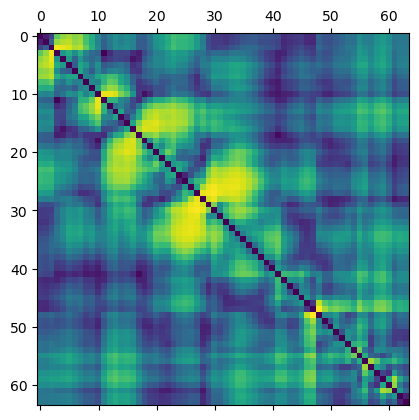

In [12]:
plt.matshow(config1[0,0,...].numpy())

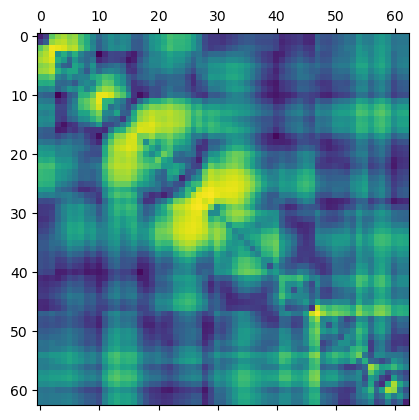

In [13]:
plt.matshow(config2[0,0,...].numpy())

#### Test the Accelerator package's interaction with the data

In [51]:
from EmbeddedRegions import EmbeddedRegions
embedding_dir = '../../data/embeddings/'
er = EmbeddedRegions(
    embedding_dir,
    chroms=training_chroms
)

In [53]:
from DataLoader import DataLoader
dl = DataLoader(
    ds_with_diag,#config_ds,
    er,
    drop_unmatched_pairs=True,
    shuffle = True, #shuffle_data,
    batch_size=64#batch_size
)

In [54]:
from accelerate import Accelerator
accelerator = Accelerator()
dl = accelerator.prepare(dl)

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /state/partition1/slurm_tmp/24756029.0.0/tmpnprjw4af
INFO:torch.distributed.nn.jit.instantiator:Writing /state/partition1/slurm_tmp/24756029.0.0/tmpnprjw4af/_remote_module_non_scriptable.py
2024-01-18 16:31:30.993134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [55]:
a = next(dl)

In [58]:
a[0].shape

torch.Size([64, 1, 64, 64])

In [59]:
b[0].shape

torch.Size([1000])

In [ ]:
asdf

In [45]:
n_var = 1000
n_samples = 5
A = torch.rand(n_samples,n_var,n_var,dtype=torch.double) * 10
b = torch.rand(n_samples,n_var,dtype=torch.double) * 10
x = torch.linalg.solve(A,b)

In [46]:
torch.allclose(torch.stack([A[i,...]@x[i,...] for i in range(A.shape[0])],dim=0),b)

True